In [271]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
dataset_names = [
         'adult',
         'Amazon_employee_access',
         #'bank-marketing',
         #'Click_prediction_small',
        # 'credit-g',
         ]

In [273]:
auto_ml_names = [
    'automl_alex',
    'tpot',
    'h2o',
    'Auto_ml',  
    'lightgbm-default',
    #'lightgbm-opt',
    'catboost-default',
    ]

In [274]:
METRIC = 'AUC'
metrics = ['AUC', 
#'log_loss', 
#'Accuracy'
]

In [275]:
bench_result = {}
for name in auto_ml_names:
    bench_result[name] = 0

In [276]:
total_place = pd.DataFrame()
for metric in metrics:
    bench_result = {}
    for name in auto_ml_names:
        bench_result[name] = 0
    for dataset_name in dataset_names:
        print(dataset_name)
        bench_auc = []
        bench_auc_std = []
        all_df = pd.DataFrame()
        for AUTOML in auto_ml_names:
            result = pd.read_csv(f'./frameworks/{AUTOML}/result/{dataset_name}_{AUTOML}_metrics.csv')
            bench_auc.append(result[metric].mean())
            bench_auc_std.append(result[metric].std())
            #tmp_df = result[metric]
            #tmp_df.columns = [AUTOML]
            all_df[AUTOML] = result[metric]
        res = pd.DataFrame(bench_auc, columns=[METRIC,], index=auto_ml_names).sort_values(by=[METRIC])
        res_std = pd.DataFrame(bench_auc_std, columns=[METRIC,], index=auto_ml_names).sort_values(by=[METRIC])
        for i, name in enumerate(res.index):
            bench_result[res.index[i]] += i+1
    #total_place.append(bench_result)
            bench = pd.io.json.json_normalize(bench_result,).T
            bench.columns = [f'{metric} place']
    total_place = pd.concat([total_place, bench], axis=1, sort=False)
            #bench = bench.sort_values(by=f'{metric} place', ascending=False)
            #bench.to_csv(f'{metric}_place.csv',)
#result.head(5)

adult
Amazon_employee_access


In [277]:
total_place

,AUC place
automl_alex,12
tpot,2
h2o,7
Auto_ml,6
lightgbm-default,6
catboost-default,9


In [266]:
res

,AUC
tpot,0.91260
h2o,0.91428
lightgbm-default,0.91444
Auto_ml,0.91466
catboost-default,0.91498
automl_alex,0.91562


In [267]:
res_std

,AUC
h2o,0.002050
tpot,0.002619
catboost-default,0.002952
Auto_ml,0.003276
lightgbm-default,0.003686
automl_alex,0.003733


In [268]:
tmp_df

0    0.8681
1    0.8488
2    0.8544
3    0.8640
4    0.8532
Name: AUC, dtype: float64

In [269]:
all_df

,automl_alex,tpot,h2o,Auto_ml,lightgbm-default,catboost-default
0,0.9108,0.9099,0.9127,0.9105,0.9104,0.9118
1,0.9177,0.9115,0.9146,0.9158,0.9155,0.9164
2,0.9171,0.9108,0.9117,0.9164,0.9159,0.9170
3,0.9198,0.9155,0.9165,0.9185,0.9193,0.9179
4,0.9127,0.9153,0.9159,0.9121,0.9111,0.9118


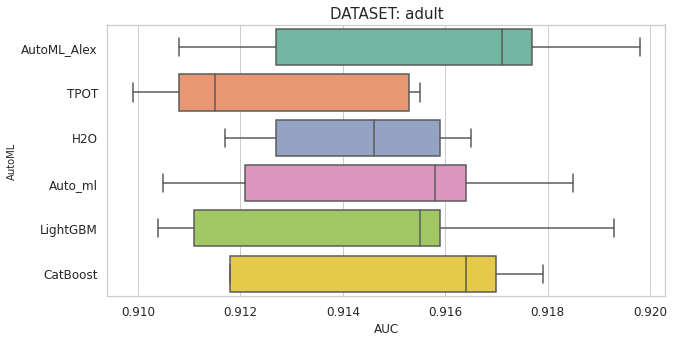

In [270]:
all_df.columns = ['AutoML_Alex', 'TPOT', 'H2O', 'Auto_ml', 'LightGBM', 'CatBoost',]
plt.figure(figsize=(10,5),)
sns.boxplot(data=all_df, orient="h", palette="Set2",).set_title('DATASET: '+dataset_name, size = 15,)
plt.tick_params(labelsize=12)
plt.ylabel("AutoML", size=10,)
plt.xlabel("AUC", size=12)
plt.savefig(f'{dataset_name}.png')

In [21]:
bench = pd.io.json.json_normalize(bench_result,).T

In [22]:
bench.columns = ['AUC place']

In [23]:
bench = bench.sort_values(by='AUC place', ascending=False)

In [24]:
bench

,AUC place
automl_alex,7
catboost-default,6
lightgbm-opt,5
Auto_ml,4
lightgbm-default,3
h2o,2
tpot,1


In [44]:
# import matplotlib.pyplot as plt
# plt.style.use('bmh')
# #import seaborn as sns
# #sns.set_style(style="darkgrid")

In [43]:
#plt.rcdefaults()
# fig, ax = plt.subplots()

# colors = color=['tab:blue', 'firebric',]

# ax.barh(bench.index, bench['AUC place'], align='center', color=colors,)
# ax.invert_yaxis()
# plt.show()

In [45]:
bench.to_csv('auc_place', index=False,)

,AUC place
lightgbm-opt,25
catboost-default,24
Auto_ml,18
h2o,18
lightgbm-default,13
tpot,7
